In [1]:
import pandas as pd
import seaborn as sns
import numpy as np 
import math
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
x= {"x":[1,2,3,4,5],"y":[2,4,5,4,5]}
x

{'x': [1, 2, 3, 4, 5], 'y': [2, 4, 5, 4, 5]}

In [3]:
df=pd.DataFrame(x)
df

,x,y
0,1,2
1,2,4
2,3,5
3,4,4
4,5,5


In [4]:
A=np.array(df)

In [5]:
A

array([[1, 2],
       [2, 4],
       [3, 5],
       [4, 4],
       [5, 5]], dtype=int64)

In [6]:
Mean = np.mean(A.T,axis=1)
Mean

array([3., 4.])

In [7]:
x_mean=Mean[0]
print("X_mean : " , x_mean) 
y_mean=Mean[1]
print("Y_mean : ", y_mean  )

X_mean :  3.0
Y_mean :  4.0


In [8]:
#Calculating the distance of x and y from the mean i.e x-X_mean and y-y_mean
dist= A-Mean
dist

array([[-2., -2.],
       [-1.,  0.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 2.,  1.]])

In [9]:
df['x_min_x_mean']=dist[:,0]
df

,x,y,x_min_x_mean
0,1,2,-2.0
1,2,4,-1.0
2,3,5,0.0
3,4,4,1.0
4,5,5,2.0


In [10]:
df['y_min_y_mean']=dist[:,1]
df

,x,y,x_min_x_mean,y_min_y_mean
0,1,2,-2.0,-2.0
1,2,4,-1.0,0.0
2,3,5,0.0,1.0
3,4,4,1.0,0.0
4,5,5,2.0,1.0


In [15]:
#m= cov(x,y)/var(x)
print("calculate covariance matrix of centered matrix")
V = np.cov(dist.T)    #wrong
print(V)

calculate covariance matrix of centered matrix
[[2.5 1.5]
 [1.5 1.5]]


In [18]:
dist[:,0].sum() #wrong

0.0

In [19]:
dist[:,1].sum() #wrong

0.0

## correct formulae for Finding covariance in Lr

In [11]:
dist[:,0]*dist[:,1]  #Submission(x-x_mean)*(y-y_mean)

array([ 4., -0.,  0.,  0.,  2.])

In [12]:
cov=sum(dist[:,0]*dist[:,1])
cov

6.0

In [13]:
var=dist[:,0]*dist[:,0]   #Variance= Submission(x-x_mean)^2 , first square then do submission
var

array([4., 1., 0., 1., 4.])

In [14]:
var=sum(var)
var

10.0

In [15]:
m = cov/var
m

0.6

In [16]:
#c= y_mean- m*x_mean

c=y_mean-m*x_mean
c

2.2

In [36]:
#y= 0.6x+2.2 Equation


In [17]:
df["y_pred"]=m*df['x']+c
df

,x,y,x_min_x_mean,y_min_y_mean,y_pred
0,1,2,-2.0,-2.0,2.8
1,2,4,-1.0,0.0,3.4
2,3,5,0.0,1.0,4.0
3,4,4,1.0,0.0,4.6
4,5,5,2.0,1.0,5.2


## Visualizing the graph to see how close best fit line with actual data points

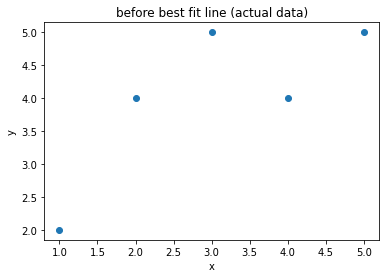

In [18]:
plt.scatter(df.x,df.y)
plt.title('before best fit line (actual data)')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

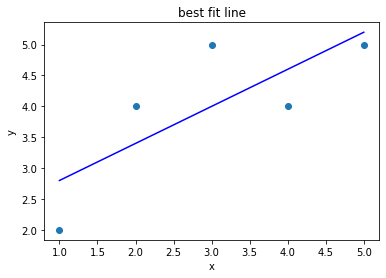

In [23]:
plt.scatter(df.x,df.y)
plt.title('best fit line')
plt.plot(df.x,m*df.x+c,"b-")
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# now calculating the residual error i.e E

In [87]:
#e= y-y_pred

In [85]:
df['E']=df['y']-df['y_pred']
df

,x,y,x_min_x_mean,y_min_y_mean,y_pred,E
0,1,2,-2.0,-2.0,2.8,-0.8
1,2,4,-1.0,0.0,3.4,0.6
2,3,5,0.0,1.0,4.0,1.0
3,4,4,1.0,0.0,4.6,-0.6
4,5,5,2.0,1.0,5.2,-0.2


## now calculating the SSE i.e sum(E^2) (sum of Squares error)

In [86]:
#sse= sum(E^2)

In [88]:
df["sse"]=df['E']**2
df

,x,y,x_min_x_mean,y_min_y_mean,y_pred,E,sse
0,1,2,-2.0,-2.0,2.8,-0.8,0.64
1,2,4,-1.0,0.0,3.4,0.6,0.36
2,3,5,0.0,1.0,4.0,1.0,1.00
3,4,4,1.0,0.0,4.6,-0.6,0.36
4,5,5,2.0,1.0,5.2,-0.2,0.04


In [90]:
sse= sum(df['sse'])
sse

2.3999999999999995

## now calculating the mean squared error i.e submission E^2/ no. of sample (N)

In [101]:
N=df.count().iloc[0]
N

5

In [102]:
MSE= sse/ N
MSE

0.47999999999999987

## now calculating the root mean squared error i.e rmse= Square root of mse

In [106]:
rmse= math.sqrt(MSE)
rmse

0.6928203230275508

## now calculating the R square , r_square = 1-rss or sse / tss

In [107]:
#r_square= 1-sse/tss
#sse (sum of squared errors) = rss (residualsum of squares errors)
#tss(total sum of squares)= submission (y-y_mean)

In [108]:
df

,x,y,x_min_x_mean,y_min_y_mean,y_pred,E,sse
0,1,2,-2.0,-2.0,2.8,-0.8,0.64
1,2,4,-1.0,0.0,3.4,0.6,0.36
2,3,5,0.0,1.0,4.0,1.0,1.00
3,4,4,1.0,0.0,4.6,-0.6,0.36
4,5,5,2.0,1.0,5.2,-0.2,0.04


In [109]:
df['y_min_y_mean_square']=df['y_min_y_mean']**2

In [110]:
df

,x,y,x_min_x_mean,y_min_y_mean,y_pred,E,sse,y_min_y_mean_square
0,1,2,-2.0,-2.0,2.8,-0.8,0.64,4.0
1,2,4,-1.0,0.0,3.4,0.6,0.36,0.0
2,3,5,0.0,1.0,4.0,1.0,1.00,1.0
3,4,4,1.0,0.0,4.6,-0.6,0.36,0.0
4,5,5,2.0,1.0,5.2,-0.2,0.04,1.0


In [112]:
tss=sum(df.y_min_y_mean_square)
tss

6.0

In [113]:
r_sqaure= 1-sse/tss
r_sqaure

0.6000000000000001

In [115]:
#higher the value of R_square explains how good a model is
#if r_square close to 1 , then model is best
#if r_square = 1 , then it is perfect model.

# Q2 

In [24]:
data={"x":[95,85,80,70,60],"y":[85,95,70,65,70]}
data

{'x': [95, 85, 80, 70, 60], 'y': [85, 95, 70, 65, 70]}

In [25]:
df=pd.DataFrame(data)
df

,x,y
0,95,85
1,85,95
2,80,70
3,70,65
4,60,70


In [26]:
A=np.array(df)
A

array([[95, 85],
       [85, 95],
       [80, 70],
       [70, 65],
       [60, 70]], dtype=int64)

In [27]:
Mean= np.mean(A.T,axis=1)
Mean

array([78., 77.])

In [28]:
x_mean=Mean[0]
print("X_mean : " , x_mean) 
y_mean=Mean[1]
print("Y_mean : ", y_mean  )

X_mean :  78.0
Y_mean :  77.0


In [29]:
#Calculating the distance of x and y from the mean i.e x-X_mean and y-y_mean
dist= A-Mean
dist

array([[ 17.,   8.],
       [  7.,  18.],
       [  2.,  -7.],
       [ -8., -12.],
       [-18.,  -7.]])

In [30]:
df['x_min_x_mean']=dist[:,0]
df

,x,y,x_min_x_mean
0,95,85,17.0
1,85,95,7.0
2,80,70,2.0
3,70,65,-8.0
4,60,70,-18.0


In [31]:
df['y_min_y_mean']=dist[:,1]
df

,x,y,x_min_x_mean,y_min_y_mean
0,95,85,17.0,8.0
1,85,95,7.0,18.0
2,80,70,2.0,-7.0
3,70,65,-8.0,-12.0
4,60,70,-18.0,-7.0


In [32]:
cov=sum(dist[:,0]*dist[:,1])
cov

470.0

In [33]:
var=dist[:,0]*dist[:,0]   #Variance= Submission(x-x_mean)^2 , first square then do submission
var

array([289.,  49.,   4.,  64., 324.])

In [34]:
df["x_min_x_mean_square"]=dist[:,0]*dist[:,0]
df

,x,y,x_min_x_mean,y_min_y_mean,x_min_x_mean_square
0,95,85,17.0,8.0,289.0
1,85,95,7.0,18.0,49.0
2,80,70,2.0,-7.0,4.0
3,70,65,-8.0,-12.0,64.0
4,60,70,-18.0,-7.0,324.0


In [35]:
var=sum(var)
var

730.0

In [36]:
m=cov/var
m

0.6438356164383562

In [37]:
c=y_mean-m*x_mean
c

26.78082191780822

In [38]:
df["y_pred"]=m*df['x']+c
df

,x,y,x_min_x_mean,y_min_y_mean,x_min_x_mean_square,y_pred
0,95,85,17.0,8.0,289.0,87.945205
1,85,95,7.0,18.0,49.0,81.506849
2,80,70,2.0,-7.0,4.0,78.287671
3,70,65,-8.0,-12.0,64.0,71.849315
4,60,70,-18.0,-7.0,324.0,65.410959


## visualizing 

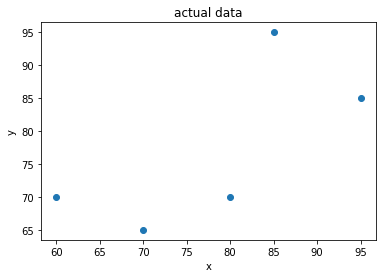

In [40]:
plt.scatter(df.x,df.y)
plt.title('actual data')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

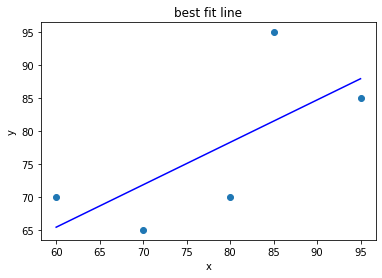

In [41]:
plt.scatter(df.x,df.y)
plt.title('best fit line')
plt.plot(df.x,m*df.x+c,"b-")
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [138]:
y_sevfive =m*75+c
y_sevfive

75.06849315068493

In [139]:
df['E']=df['y']-df['y_pred']
df

,x,y,x_min_x_mean,y_min_y_mean,x_min_x_mean_square,y_pred,E
0,95,85,17.0,8.0,289.0,87.945205,-2.945205
1,85,95,7.0,18.0,49.0,81.506849,13.493151
2,80,70,2.0,-7.0,4.0,78.287671,-8.287671
3,70,65,-8.0,-12.0,64.0,71.849315,-6.849315
4,60,70,-18.0,-7.0,324.0,65.410959,4.589041


In [140]:
df["sse"]=df['E']**2
df

,x,y,x_min_x_mean,y_min_y_mean,x_min_x_mean_square,y_pred,E,sse
0,95,85,17.0,8.0,289.0,87.945205,-2.945205,8.674235
1,85,95,7.0,18.0,49.0,81.506849,13.493151,182.065115
2,80,70,2.0,-7.0,4.0,78.287671,-8.287671,68.685494
3,70,65,-8.0,-12.0,64.0,71.849315,-6.849315,46.913117
4,60,70,-18.0,-7.0,324.0,65.410959,4.589041,21.059298


In [142]:
sse=sum(df['sse'])
sse

327.3972602739725

In [143]:
N=df.count().iloc[0]
N

5

In [144]:
MSE= sse/ N
MSE

65.4794520547945

In [145]:
rmse= math.sqrt(MSE)
rmse

8.09193747224943

In [146]:
df['y_min_y_mean_square']=df['y_min_y_mean']**2
df

,x,y,x_min_x_mean,y_min_y_mean,x_min_x_mean_square,y_pred,E,sse,y_min_y_mean_square
0,95,85,17.0,8.0,289.0,87.945205,-2.945205,8.674235,64.0
1,85,95,7.0,18.0,49.0,81.506849,13.493151,182.065115,324.0
2,80,70,2.0,-7.0,4.0,78.287671,-8.287671,68.685494,49.0
3,70,65,-8.0,-12.0,64.0,71.849315,-6.849315,46.913117,144.0
4,60,70,-18.0,-7.0,324.0,65.410959,4.589041,21.059298,49.0


In [147]:
tss=sum(df.y_min_y_mean_square)
tss

630.0

In [148]:
r_sqaure= 1-sse/tss
r_sqaure

0.4803218090889325